In [1]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import os
import tarfile
import urllib.request
import pandas as pd

In [2]:
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [4]:
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Profundiza en la relación existente entre las variables median_house_value y median_in-
come, obtén:

In [5]:
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)
# Ajuste con longitude
# extraer variable y convertir en np.array-----------------------
x = housing["median_income"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)

y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
% r2_score(y, y_pred))

Coeficiente de det. R2: 0.4734


a) La ecuación del modelo de regresión lineal simple con la estimación de los coefi-
cientes.

In [6]:
# se pueden obtener los coeficientes-----------------------------
print("Beta1: ", lm1.coef_)
print("Beta0: ", lm1.intercept_)

Beta1:  [[41793.8492019]]
Beta0:  [45085.57670327]


${Y = 45085.58 + 41793.85 · X}$

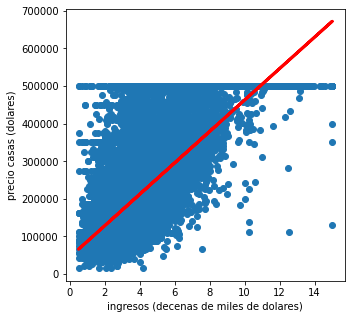

In [7]:
# obtener valores modelo-----------------------------------------
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(x, y)
# pintar recta de regresion--------------------------------------
y_pred = lm1.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3)
# definir ejes---------------------------------------------------
plt.xlabel("ingresos (decenas de miles de dolares)")
plt.ylabel("precio casas (dolares)")
# mostrar grafico------------------------------------------------
plt.show()

b) La estimación por MLE y por OLS de la varianza del modelo.

In [8]:
# calcular sigma2------------------------------------------------
y_resta = (y - y_pred) ** 2
print(sum(y_resta)/len(y))

[7.0113115e+09]


In [9]:
# estimador de la varianza por OLS-------------------------------
print(sum(y_resta)/(len(y)-2))

[7.01199096e+09]


En este caso, al ser n muy grande, no existe apenas diferencia entre ambos estimadores.